# Análisis Temporal — Evolución de Depósitos y Retiros por Año

# Objetivo

El objetivo principal de este análisis exploratorio de datos (EDA) es obtener un entendimiento profundo y claro del comportamiento de las transacciones bancarias presentes en el dataset.
Este tipo de análisis es fundamental para:

Comprender la estructura y calidad de los datos.

Identificar patrones, tendencias y anomalías.

Detectar posibles riesgos financieros, fraudes o actividades sospechosas.

Guiar futuras decisiones analíticas o modelos predictivos.

# Descripción del Dataset

Este dataset contiene transacciones bancarias consolidadas de diferentes cuentas, con variables como:

Account No: Número de cuenta involucrada en la transacción.

DATE: Fecha de la transacción.

TRANSACTION DETAILS: Descripción o narración de la transacción.

CHQ.NO.: Número de cheque (cuando aplica).

VALUE DATE: Fecha efectiva de la transacción.

WITHDRAWAL AMT: Monto de retiro.

DEPOSIT AMT: Monto de depósito.

BALANCE AMT: Saldo de la cuenta tras la transacción.

# Objetivos del EDA

1. Examinar la estructura y tipos de datos.

2. Detectar valores faltantes o inconsistentes.

3. Explorar la distribución de montos de depósitos y retiros.

4. Analizar la actividad por cuenta bancaria.

5. Identificar transacciones inusuales o extremas.

6. Visualizar tendencias y patrones temporales.

----

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/Databases/Financial and Bank/Bank Transaction Data/bank.xlsx'

df = pd.read_excel(file_path)

# Mostrar las primeras 5 filas para confirmar que se cargó correctamente
df.head()

Mounted at /content/drive


,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,.


Las columnas se han leído bien, pero hay un pequeño detalle:

Aparece una columna adicional sin nombre, con solo puntos (.) como valor.

Esa columna sobra y luego la eliminaremos.

Los montos están correctamente leídos como números (ver DEPOSIT AMT y BALANCE AMT).

Las fechas están en formato adecuado (aunque luego las vamos a convertir explícitamente a tipo fecha).

In [2]:
# Ver columnas del dataset
print("Columnas originales:")
print(df.columns)

# Eliminar la columna sobrante que no aporta valor
df = df.drop(columns=[df.columns[-1]])  # Última columna con puntos

# Verificar tamaño del dataset (filas y columnas)
print("\nTamaño del dataset:")
print(df.shape)

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Mostrar un resumen rápido de los datos numéricos
print("\nResumen estadístico:")
print(df.describe())

Columnas originales:
Index(['Account No', 'DATE', 'TRANSACTION DETAILS', 'CHQ.NO.', 'VALUE DATE',
       'WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT', '.'],
      dtype='object')

Tamaño del dataset:
(116201, 8)

Tipos de datos:
Account No                     object
DATE                   datetime64[ns]
TRANSACTION DETAILS            object
CHQ.NO.                       float64
VALUE DATE             datetime64[ns]
WITHDRAWAL AMT                float64
DEPOSIT AMT                   float64
BALANCE AMT                   float64
dtype: object

Resumen estadístico:
                                DATE        CHQ.NO.  \
count                         116201     905.000000   
mean   2017-05-20 00:08:40.477448448  791614.503867   
min              2015-01-01 00:00:00       1.000000   
25%              2016-05-30 00:00:00  704231.000000   
50%              2017-06-05 00:00:00  873812.000000   
75%              2018-05-26 00:00:00  874167.000000   
max              2019-03-05 00:00:00  874525

**Resumen Estadístico (Insights Clave):**

Hay transacciones con montos muy altos:

Máximo retiro: ~459 millones.

Máximo depósito: ~544 millones.

Muchos montos pequeños también:

Montos mínimos desde 0.01.

El saldo promedio es muy negativo: alrededor de -1,404 millones (esto probablemente se deba a cuentas específicas con grandes saldos negativos, como ya vimos antes).

Fechas van desde 2015-01-01 hasta 2019-03-05 → tienes casi 4 años de datos.

La columna de cheques (CHQ.NO.) es poco usada, pero podemos conservarla por ahora.

-----

1. Verificar y contar los valores nulos.

2. Decidir cómo tratar los valores nulos:

  Cheques (CHQ.NO.): Muchos nulos, pero no críticos → No eliminaremos esas filas.

  Montos (WITHDRAWAL AMT, DEPOSIT AMT):

  Rellenar nulos con 0 para indicar “sin retiro” o “sin depósito”.

  Saldos (BALANCE AMT): No parece tener nulos, pero se verifica igual.

3. Crear columnas adicionales:

  Año y Mes de la transacción → Para análisis temporal.

  Si quieres, más adelante podríamos crear también una columna con el "Tipo de transacción" según si es depósito, retiro o ambos.

In [3]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Rellenar nulos en montos con 0 (indicando sin movimiento)
df['WITHDRAWAL AMT'] = df['WITHDRAWAL AMT'].fillna(0)
df['DEPOSIT AMT'] = df['DEPOSIT AMT'].fillna(0)

# Revisar que ya no haya nulos en montos
print("\n¿Aún hay nulos en montos?")
print(df[['WITHDRAWAL AMT', 'DEPOSIT AMT']].isnull().sum())

# Crear columnas adicionales: Año y Mes
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

# Verificar las nuevas columnas
print("\nPrimeras filas con nuevas columnas:")
print(df[['DATE', 'YEAR', 'MONTH']].head())

Valores nulos por columna:
Account No                  0
DATE                        0
TRANSACTION DETAILS      2499
CHQ.NO.                115296
VALUE DATE                  0
WITHDRAWAL AMT          62652
DEPOSIT AMT             53549
BALANCE AMT                 0
dtype: int64

¿Aún hay nulos en montos?
WITHDRAWAL AMT    0
DEPOSIT AMT       0
dtype: int64

Primeras filas con nuevas columnas:
        DATE  YEAR  MONTH
0 2017-06-29  2017      6
1 2017-07-05  2017      7
2 2017-07-18  2017      7
3 2017-08-01  2017      8
4 2017-08-16  2017      8


In [4]:
# Filtrar registros con TRANSACTION DETAILS nulo
missing_details = df[df['TRANSACTION DETAILS'].isnull()]

# Mostrar cantidad de registros con nulo en TRANSACTION DETAILS
print("Total de registros con TRANSACTION DETAILS nulo:", len(missing_details))

# Analizar cuántos mueven dinero (retiros o depósitos)
active_missing = missing_details[
    (missing_details['WITHDRAWAL AMT'] > 0) | (missing_details['DEPOSIT AMT'] > 0)
]

print("\nTransacciones sin descripción que mueven dinero:")
print("Cantidad:", len(active_missing))

# Sumar montos movidos por estas transacciones sin descripción
total_withdrawals = active_missing['WITHDRAWAL AMT'].sum()
total_deposits = active_missing['DEPOSIT AMT'].sum()

print("\nMontos movidos por estas transacciones sin descripción:")
print(f"Total retirado: {total_withdrawals:,.2f}")
print(f"Total depositado: {total_deposits:,.2f}")

Total de registros con TRANSACTION DETAILS nulo: 2499

Transacciones sin descripción que mueven dinero:
Cantidad: 2499

Montos movidos por estas transacciones sin descripción:
Total retirado: 0.00
Total depositado: 30,497,000,000.00


Hay 2,499 transacciones sin descripción.

Todas estas transacciones mueven dinero.

Solo movieron depósitos (no hay retiros en estos registros).

El total depositado en esas transacciones es muy alto:
30,497,000,000.00 → más de 30 mil millones (valor significativo).

**Conclusión Importante:**

Estas transacciones no pueden ser ignoradas ni eliminadas, ya que:

1. Representan un volumen muy alto de dinero.

2. Aunque no tienen descripción, sí tienen impacto financiero

In [5]:
# Rellenar las transacciones sin descripción con un valor genérico
df['TRANSACTION DETAILS'] = df['TRANSACTION DETAILS'].fillna("UNKNOWN TRANSACTION")

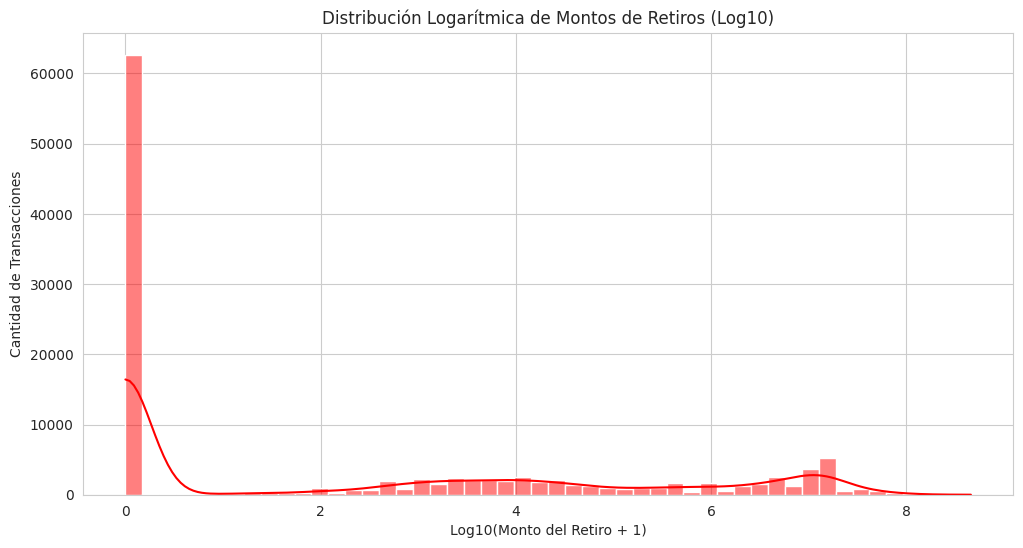

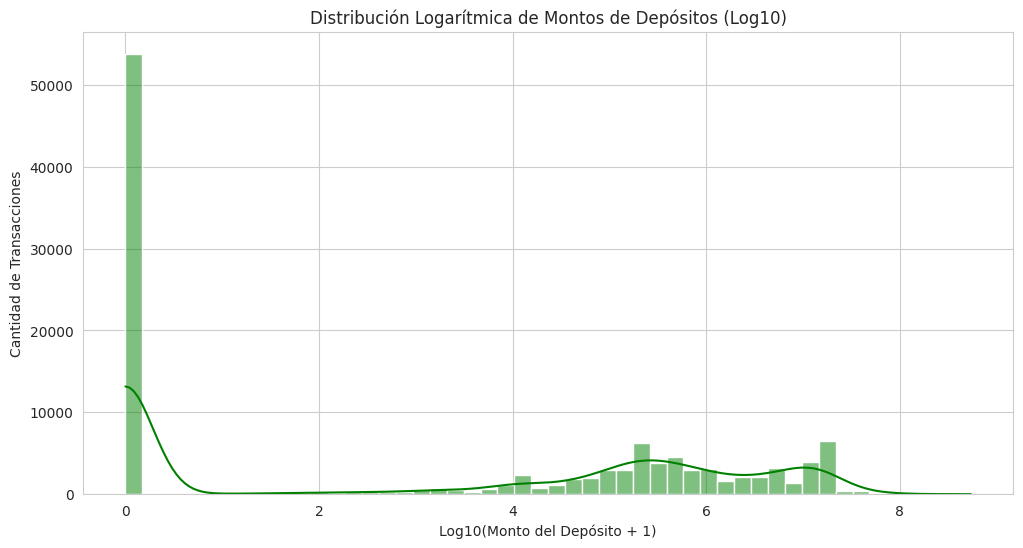

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo de los gráficos
sns.set_style("whitegrid")

# Agregar 1 a los montos para evitar problemas con log(0)
withdrawals = df['WITHDRAWAL AMT'] + 1
deposits = df['DEPOSIT AMT'] + 1

# Graficar distribución de Retiros (log10 para mejor visualización)
plt.figure(figsize=(12,6))
sns.histplot(np.log10(withdrawals), bins=50, kde=True, color='red')
plt.title('Distribución Logarítmica de Montos de Retiros (Log10)')
plt.xlabel('Log10(Monto del Retiro + 1)')
plt.ylabel('Cantidad de Transacciones')
plt.show()

# Graficar distribución de Depósitos (log10 para mejor visualización)
plt.figure(figsize=(12,6))
sns.histplot(np.log10(deposits), bins=50, kde=True, color='green')
plt.title('Distribución Logarítmica de Montos de Depósitos (Log10)')
plt.xlabel('Log10(Monto del Depósito + 1)')
plt.ylabel('Cantidad de Transacciones')
plt.show()

**Análisis del Gráfico de Depósitos (Distribución Logarítmica)**

***Observaciones:***

  Altísima concentración de transacciones pequeñas:

  Más de 50,000 transacciones tienen depósitos muy pequeños (parte izquierda del gráfico, log10 cerca de 0).

  Esto corresponde a depósitos entre 0 y 10 unidades monetarias aproximadamente.

  Transacciones medianas a grandes:

  Hay varios "picos" entre log10 ≈ 4 y 7:

  Log10 ≈ 4 → Depósitos de aproximadamente 10,000 unidades.

  Log10 ≈ 6 → Depósitos de alrededor de 1 millón.

  Log10 ≈ 8 → Depósitos superiores a 100 millones.

**Distribución sesgada a la derecha:**

La mayoría de las transacciones son pequeñas.

Pocas transacciones con montos muy altos → podrían indicar:

Transacciones corporativas.

Transferencias masivas.

Posibles focos de análisis para fraude o lavado.

***Conclusión del Gráfico:***

El banco opera principalmente con depósitos pequeños.

Hay un número reducido pero importante de transacciones de gran volumen que podrían requerir análisis más detallado.

**Análisis del Gráfico de Retiros (Distribución Logarítmica)**

***Observaciones Clave:***

Extrema concentración en transacciones pequeñas:

Más de 60,000 transacciones tienen retiros muy pequeños (log10 ≈ 0).

Esto corresponde a retiros menores a 10 unidades monetarias, aproximadamente.

Cola larga hacia la derecha:

Hay una serie de transacciones medianas y grandes:

Log10 ≈ 4 → Retiros de aproximadamente 10,000.

Log10 ≈ 6 → Retiros de alrededor de 1 millón.

Log10 ≈ 8 → Retiros superiores a 100 millones.

Estos valores extremos generan una "cola larga" típica de operaciones financieras.

Patrón similar al gráfico de depósitos:

Muchas transacciones pequeñas.

Algunos pocos retiros de gran volumen → posibles puntos críticos para análisis de:

Transacciones corporativas.

Transferencias sospechosas.

Fraude o lavado.

**Conclusión del Análisis Visual (Depósitos + Retiros):**

Ambos tipos de transacciones presentan un patrón típico en datos financieros:

Muchas transacciones de bajo monto.

Algunas pocas transacciones con valores muy altos (potenciales focos de atención).

**Esto puede indicar:**

Operaciones regulares de personas y empresas pequeñas.

Transferencias de alto riesgo o relevancia por el volumen.


Resumen por año:
   YEAR  WITHDRAWAL AMT   DEPOSIT AMT
0  2015    5.313574e+10  5.183045e+10
1  2016    1.001238e+11  9.977801e+10
2  2017    5.685767e+10  5.719742e+10
3  2018    2.917814e+10  2.859914e+10
4  2019    1.096300e+09  1.085201e+09


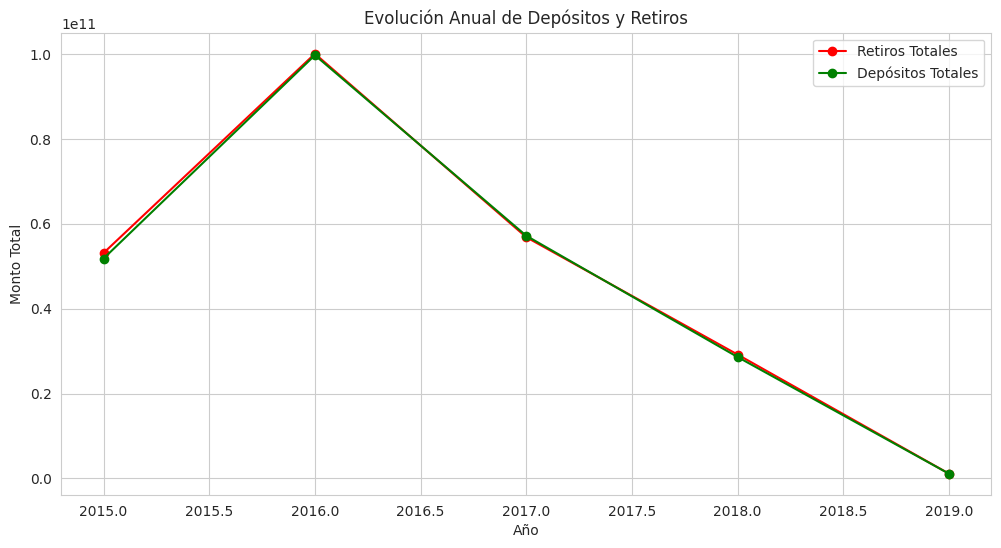

In [7]:
# Agrupar por año y sumar depósitos y retiros
yearly_summary = df.groupby('YEAR')[['WITHDRAWAL AMT', 'DEPOSIT AMT']].sum().reset_index()

print("\nResumen por año:")
print(yearly_summary)

# Gráfico de la evolución anual de depósitos y retiros
plt.figure(figsize=(12,6))
plt.plot(yearly_summary['YEAR'], yearly_summary['WITHDRAWAL AMT'], marker='o', label='Retiros Totales', color='red')
plt.plot(yearly_summary['YEAR'], yearly_summary['DEPOSIT AMT'], marker='o', label='Depósitos Totales', color='green')
plt.title('Evolución Anual de Depósitos y Retiros')
plt.xlabel('Año')
plt.ylabel('Monto Total')
plt.legend()
plt.grid(True)
plt.show()

**Año 2016 con actividad extraordinaria:**

Tanto los depósitos como los retiros alcanzan su punto más alto en 2016, superando los 100,000 millones.

Esto sugiere un evento o comportamiento inusual en ese año, posiblemente:

Grandes transferencias de fondos.

Cambios regulatorios.

Transacciones atípicas.

**Descenso marcado desde 2017:**

A partir de 2017, la actividad disminuye drásticamente cada año.

**Para 2019, los montos son casi insignificantes, lo que puede indicar:**

Cierre de cuentas o desactivación.

Cambio de sistema o banco.

Reducción operativa.

***Simetría entre depósitos y retiros:***

Las líneas de depósitos y retiros son muy similares en todo el período.

Esto sugiere un sistema donde los fondos que ingresan tienden a salir en similares proporciones (flujo controlado o circular de dinero).


Resumen mensual:
  YEAR_MONTH  WITHDRAWAL AMT  DEPOSIT AMT
0    2015-01    1.138193e+08  116246479.0
1    2015-02    1.254287e+08  126872940.0
2    2015-03    1.129955e+08  108534650.0
3    2015-04    1.161987e+08  116687860.0
4    2015-05    1.606132e+08  161203770.0


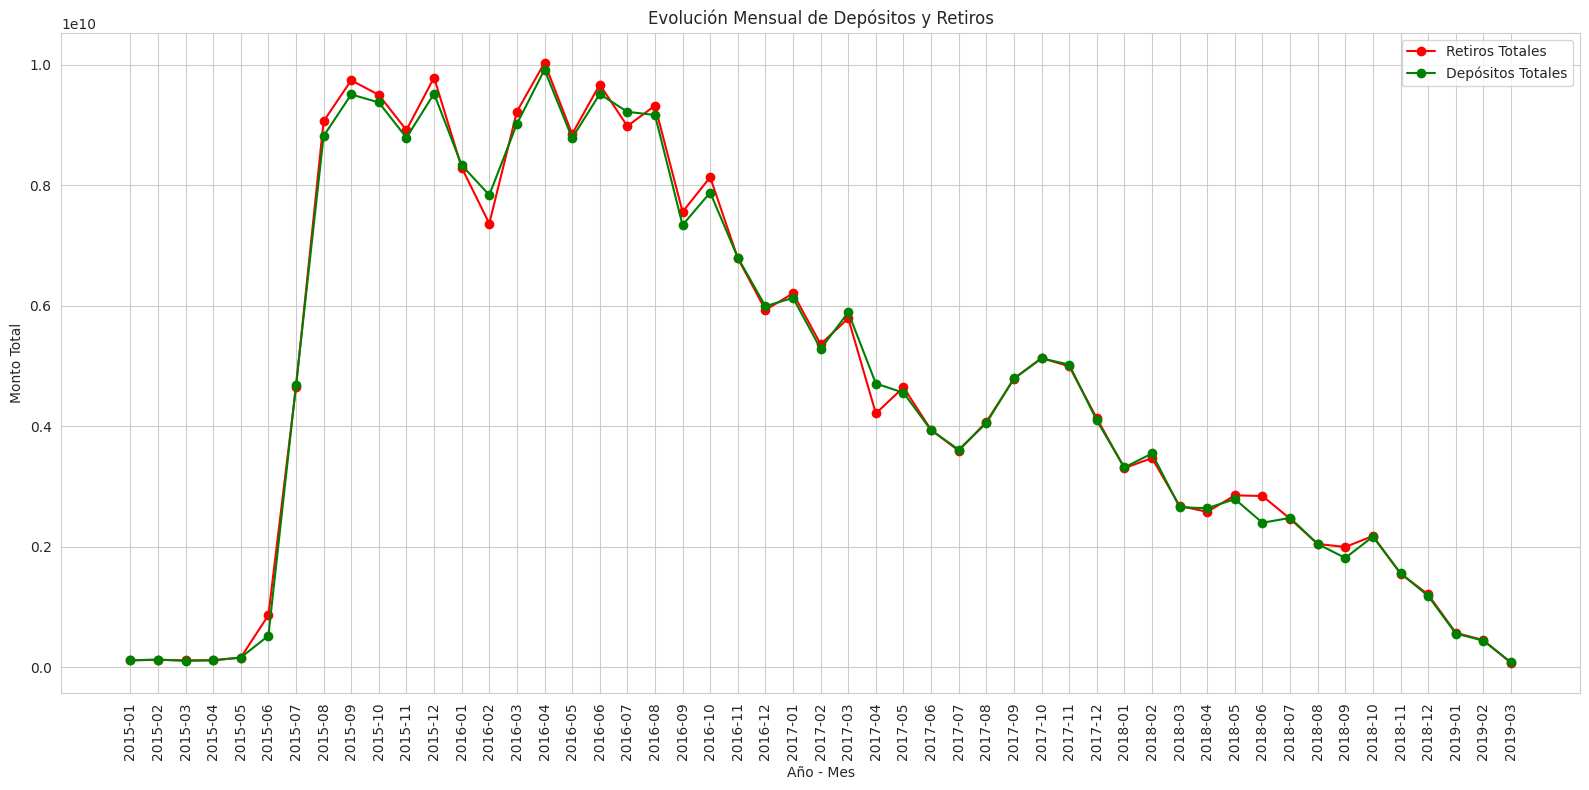

In [8]:
# Crear columna combinada de año y mes
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M').astype(str)

# Agrupar por año y mes
monthly_summary = df.groupby('YEAR_MONTH')[['WITHDRAWAL AMT', 'DEPOSIT AMT']].sum().reset_index()

print("\nResumen mensual:")
print(monthly_summary.head())

# Gráfico de evolución mensual de depósitos y retiros
plt.figure(figsize=(16,8))
plt.plot(monthly_summary['YEAR_MONTH'], monthly_summary['WITHDRAWAL AMT'], marker='o', label='Retiros Totales', color='red')
plt.plot(monthly_summary['YEAR_MONTH'], monthly_summary['DEPOSIT AMT'], marker='o', label='Depósitos Totales', color='green')
plt.title('Evolución Mensual de Depósitos y Retiros')
plt.xlabel('Año - Mes')
plt.ylabel('Monto Total')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Inicio lento, luego un gran salto:**

Hasta mediados de 2015, los montos eran muy bajos o nulos.

A partir de julio 2015 hay un aumento drástico tanto en depósitos como en retiros.

**Esto sugiere:**

Inicio de operaciones activas.

Apertura de cuentas o ingreso de capitales grandes.

Altísima actividad entre mediados de 2015 y finales de 2016:

Fluctuaciones elevadas y repetidas con picos casi mensuales.

Patrón muy marcado de alta actividad, casi perfectamente correlacionada entre depósitos y retiros → flujo circular de dinero.

**Descenso gradual pero sostenido desde 2017:**

A partir de 2017 comienza una disminución progresiva y continua hasta 2019.

**Esto podría indicar:**

Cierre gradual de operaciones o cuentas.

Regulaciones más estrictas o restricciones operativas.

Fin de un ciclo financiero.

Relación casi idéntica entre depósitos y retiros:

**Las dos líneas siguen prácticamente la misma trayectoria en todos los meses → posible señal de:**

Transferencias automatizadas.

Operaciones de “entrada y salida” rápida del dinero.

Movimientos estructurados


In [10]:
# Agrupar por cuenta y calcular totales y conteo
account_summary = df.groupby('Account No').agg({
    'WITHDRAWAL AMT': 'sum',
    'DEPOSIT AMT': 'sum',
    'DATE': 'count'
}).reset_index().rename(columns={
    'WITHDRAWAL AMT': 'Total_Retiros',
    'DEPOSIT AMT': 'Total_Depositos',
    'DATE': 'Num_Transacciones'
})

# Mostrar las cuentas con mayor número de transacciones
top_accounts_by_transactions = account_summary.sort_values(by='Num_Transacciones', ascending=False).head(10)
print("Top 10 cuentas con más transacciones:")
print(top_accounts_by_transactions)

# Mostrar las cuentas con mayor monto depositado
top_accounts_by_deposits = account_summary.sort_values(by='Total_Depositos', ascending=False).head(10)
print("\nTop 10 cuentas con mayores depósitos:")
print(top_accounts_by_deposits)

# Mostrar las cuentas con mayor monto retirado
top_accounts_by_withdrawals = account_summary.sort_values(by='Total_Retiros', ascending=False).head(10)
print("\nTop 10 cuentas con mayores retiros:")
print(top_accounts_by_withdrawals)

Top 10 cuentas con más transacciones:
      Account No  Total_Retiros  Total_Depositos  Num_Transacciones
0       1196428'   6.848283e+10     6.838251e+10              48779
2  409000362497'   1.019351e+11     1.017209e+11              29840
6  409000438620'   1.719608e+10     1.720243e+10              13454
1       1196711'   4.692584e+10     4.587889e+10              10536
8  409000493210'   1.006049e+08     1.022096e+08               6014
5  409000438611'   4.705551e+09     4.705899e+09               4588
9  409000611074'   1.453974e+08     1.458596e+08               1093
7  409000493201'   9.537793e+07     9.565931e+07               1044
4  409000425051'   3.845102e+08     2.703186e+07                802
3  409000405747'   4.203179e+08     2.287852e+08                 51

Top 10 cuentas con mayores depósitos:
      Account No  Total_Retiros  Total_Depositos  Num_Transacciones
2  409000362497'   1.019351e+11     1.017209e+11              29840
0       1196428'   6.848283e+10     6.8

**3 cuentas concentran gran parte del movimiento del banco:**

409000362497'

1196428'

1196711'

**Estas cuentas no solo tienen muchos movimientos, sino también altos montos, lo que podría indicar:**

Operaciones de gran escala.

Posibles relaciones entre ellas (mismo patrón de depósitos y retiros).

Candidatas para un análisis de fraude.

**Otras cuentas como:**

409000438620' y 409000438611' también presentan actividad destacada, aunque a menor escala.

**Conclusiones Generales:**

El banco presenta alta concentración de movimientos en pocas cuentas.

La actividad se redujo significativamente después de 2016.

***Existen patrones de transacciones repetitivas, lo cual puede indicar:***

Operaciones legítimas recurrentes.

O posibles maniobras de lavado de dinero, como fue la motivación inicial del dataset.

**Este EDA te deja bases sólidas para:**

Modelos de detección de fraude.

Segmentación de clientes.

Detección de transacciones sospechosas.